In [17]:
import pandas as pd
import json
import io

%matplotlib inline

In [2]:
news_labels = {}
with open('/data/kasandra/year/result/2016.300.kmeans.json', encoding="utf8") as f:
    news_labels = [ { 'id': d[0], 'cluster': d[1] } for d in json.loads(f.read()).items() ]

In [3]:
df_labels = pd.DataFrame(news_labels)

In [4]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97744 entries, 0 to 97743
Data columns (total 2 columns):
cluster    97744 non-null int64
id         97744 non-null object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [5]:
df_labels.head()

,cluster,id
0,141,16334082-3792-4ac3-9549-7db8b93e1444
1,21,aff6a8eb-da43-4989-9e97-084dad079083
2,103,d0764286-db08-465e-bee0-244e7dd33d4f
3,21,70db5c59-5b6b-4969-b59d-e8386178d973
4,67,767dcced-6076-4567-bf11-9e5d425a66a4


In [6]:
df_news = pd.read_json('/data/kasandra/raw/crawled.09.04.2017.count.241436.json', lines=True, convert_dates=False)

In [7]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241436 entries, 0 to 241435
Data columns (total 6 columns):
content     241436 non-null object
date        241436 non-null int64
id          241436 non-null object
siteType    241436 non-null object
title       241436 non-null object
url         241436 non-null object
dtypes: int64(1), object(5)
memory usage: 12.9+ MB


In [8]:
df_news.head()

,content,date,id,siteType,title,url
0,В здании средней школы №11 в городе Ирбит Свер...,1302160092000,58baf205-a49c-424b-85a0-103d7538ef7b,RBC,В Свердловской области в школе прогремел взрыв,http://top.rbc.ru/incidents/07/04/2011/571878....
1,"Резкое повышение акцизов на табак, о котором н...",1302162519000,286fa12b-7acb-451e-884b-c699f36c35de,RBC,Стоимость самой дешевой пачки сигарет составит...,http://top.rbc.ru/economics/07/04/2011/571964....
2,Крупнейшему национальному домену России .ru се...,1302170086000,07efa03c-3974-41b5-bbd7-caeab38854ee,RBC,Сегодня Рунету исполняется 17 лет,http://top.rbc.ru/society/07/04/2011/571988.shtml
3,Президент США Барак Обама стал центральной тем...,1302173964000,2efc78ca-b34d-4890-8f4d-58102820b38d,RBC,Б.Обаму назвали агентом инопланетян,http://top.rbc.ru/wildworld/07/04/2011/571973....
4,Специально к 50-летию пилотируемой космонавтик...,1302176095000,e877f8c2-d26d-48a2-9e65-f659a6b2a932,RBC,Прогнозы будущего космонавтики: колонизация Ма...,http://top.rbc.ru/society/07/04/2011/572059.shtml


In [9]:
df_news_cluster = pd.merge(df_news, df_labels, on='id')

In [47]:
corpuse_news = df_news_cluster[(df_news_cluster.cluster == 224) | (df_news_cluster.cluster == 79)].drop('cluster', 1)
corpuse_news = corpuse_news.sample(200)
corpuse_news.count()

content     200
date        200
id          200
siteType    200
title       200
url         200
dtype: int64

In [48]:
corpuse_data = {
  "name": "Крымский мост и Курилы (2)(200)",
  "alias": "krim_kur_200",
  "news": list(corpuse_news.T.to_dict().values())
}

In [49]:
with open('/Users/igor/edu/kasandra-rus/kasandra_viewer/news_corpus/krim_kur_200.json', 'w', encoding='utf8') as json_file:
    json.dump(corpuse_data, json_file, ensure_ascii=False)

TypeError: bar() missing 2 required positional arguments: 'left' and 'height'

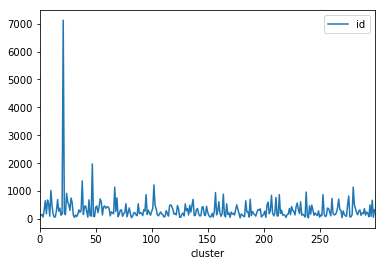

In [30]:
df_labels.groupby(['cluster']).count().plot().bar()